<a href="https://colab.research.google.com/github/Charu21/ANN/blob/main/IrisDataSet_ANN_vs_LogisticsRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot

In [138]:
iris_df = pd.read_csv('iris.csv')

In [139]:
iris_df.shape

(150, 5)

In [140]:
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [141]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [142]:
 # Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
iris_df['species']= label_encoder.fit_transform(iris_df['species'])

iris_df['species'].unique()

array([0, 1, 2])

In [143]:
X = iris_df.drop('species', axis = 1)
Y = iris_df['species']

In [144]:
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [145]:
# Normalization
min_max_scaler = preprocessing.MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(X)
X.loc[:,:] = scaled_values

In [146]:
# Iris dataset parameters.
num_classes = 3 #
num_features = 5 #

# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
epochs = 20

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.3, random_state = 2)
print('Train - ',x_train.shape)
print('Test - ',x_test.shape)

Train -  (105, 4)
Test -  (45, 4)


In [150]:
y_train[0]

0

In [151]:
y_train_ohe = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [152]:
y_train


134    2
28     0
65     1
0      0
27     0
      ..
75     1
43     0
22     0
72     1
15     0
Name: species, Length: 105, dtype: int64

# Logistics Regression

In [154]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=epochs)
logreg.fit(x_train,y_train)# fit the model
print('c',logreg.intercept_.shape) # see the intercept
print('m',logreg.coef_.shape)# see the betas
print('Train Score r2 = ',logreg.score(x_train, y_train))
print('Test Score r2 = ',logreg.score(x_test, y_test))

print('Total Number of W nd B = ', logreg.intercept_.shape[0] * logreg.coef_.shape[1])

c (3,)
m (3, 4)
Train Score r2 =  0.9047619047619048
Test Score r2 =  0.9555555555555556
Total Number of W nd B =  12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
# Predict 5 points from validation set.
n = 5
test_ip = x_train[:n]
# test_ip
predictions = logreg.predict(test_ip)
print(predictions)

# Display image and model prediction.
for i in range(n):
    # print("Y test:")
    test_ip.iloc[i-1]
    print("Model prediction: %i" % predictions[i])

[1 0 1 0 0]
Model prediction: 1
Model prediction: 0
Model prediction: 1
Model prediction: 0
Model prediction: 0


# ANN

In [163]:
# build NN model
model = Sequential()
# model.add()
model.add(Dense(512, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               2560      
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 266,755
Trainable params: 266,755
Non-trainable params: 0
_________________________________________________________________


In [164]:
# Compile
# model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
#               metrics=['accuracy'])

In [165]:
# Training parameters.
learning_rate = 0.1
batch_size = 20
display_step = 100
epochs = 20

In [166]:
history = model.fit(x_train, y_train_ohe,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test_ohe))
# Model Eval
score = model.evaluate(x_test, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
6/6 [==============================] - 1s 49ms/step - loss: 1.0122 - accuracy: 0.5619 - val_loss: 0.8851 - val_accuracy: 0.6444
Epoch 2/20
6/6 [==============================] - 0s 13ms/step - loss: 0.8048 - accuracy: 0.6667 - val_loss: 0.7146 - val_accuracy: 0.6667
Epoch 3/20
6/6 [==============================] - 0s 16ms/step - loss: 0.6535 - accuracy: 0.6667 - val_loss: 0.5660 - val_accuracy: 0.6667
Epoch 4/20
6/6 [==============================] - 0s 16ms/step - loss: 0.5377 - accuracy: 0.7238 - val_loss: 0.4636 - val_accuracy: 0.8444
Epoch 5/20
6/6 [==============================] - 0s 17ms/step - loss: 0.4605 - accuracy: 0.8381 - val_loss: 0.4297 - val_accuracy: 0.6667
Epoch 6/20
6/6 [==============================] - 0s 13ms/step - loss: 0.4183 - accuracy: 0.7524 - val_loss: 0.3828 - val_accuracy: 0.8000
Epoch 7/20
6/6 [==============================] - 0s 18ms/step - loss: 0.3718 - accuracy: 0.8762 - val_loss: 0.3458 - val_accuracy: 0.8667
Epoch 8/20
6/6 [===========

In [169]:
 # Predict
prediction=model.predict(x_test)
length=len(prediction)
y_label=np.argmax(y_test_ohe,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100
print("Accuracy of the dataset",accuracy )

2/2 [==============================] - 0s 10ms/step
Accuracy of the dataset 95.55555555555556


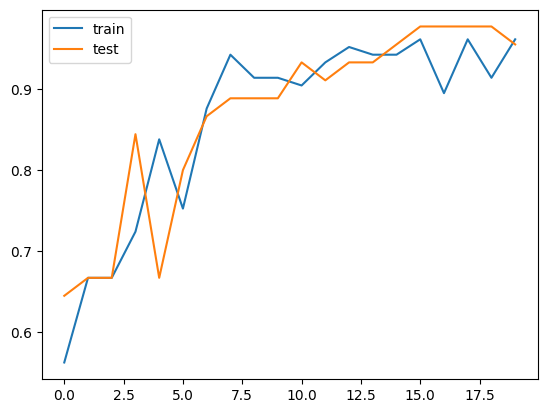

In [170]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()